# Part 0: Set-up

In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS1-Ace/main/data/Queried_Data/PS2references")
df

Item type                                            Authors  \
0   Journal Article                                           Ozimek A   
1   Journal Article                                            Jacks T   
2   Journal Article  Galanti T,Guidetti G,Mazzei E,Zappalà S,Toscano F   
3   Journal Article  Brynjolfsson E,Horton J,Ozimek A,Rock D,Sharma...   
4   Journal Article                                 Tomić D,Vizinger K   
5   Journal Article                                       Fan W,Moen P   
6     Miscellaneous                                            Gupta A   
7   Journal Article              Tursunbayeva A,Di Lauro S,Antonelli G   
8   Journal Article                    Battisti E,Alfiero S,Leonidou E   
9     Miscellaneous                       Parker K,Horowitz J,Minkin R   
10    Miscellaneous                                                  G   
11    Miscellaneous                                            Coate P   
12  Journal Article                                         Goldberg E   
13    Miscellaneous                                           Morgan S   

                                                Title  \
0                           The Future of Remote Work   
1      Research on Remote Work in the Era of COVID-19   
2         Work from Home during the COVID-19 Outbreak   
3   COVID-19 and remote work: An early look at US ...   
4   Effects of Remote Business During the Covid-19...   
5   Ongoing Remote Work, Returning to Working at W...   
6             Accelerating Remote Work After COVID-19   
7   Remote Work at the Time of COVID-19 Pandemic a...   
8   Remote working and digital transformation duri...   
9   How Coronavirus Has Changed the Way Americans ...   
10                                      Google Trends   
11  Remote Work Before, During, and After the Pand...   
12  A Two-Year, 50-Million-Person Experiment in Ch...   
13                Cybersecurity Jobs Report 2018-2021   

                                              Journal  Publication year  \
0                             SSRN Electronic Journal              2020   
1   Journal of Global Information Technology Manag...              2021   
2    Journal of Occupational & Environmental Medicine              2021   
3                National Bureau of Economic Research              2020   
4   American Journal of Economics and Business Inn...              2023   
5               Journal of Health and Social Behavior              2023   
6                                                 NaN              2020   
7               HR Analytics and Digital HR Practices              2021   
8                        Journal of Business Research              2022   
9                                                 NaN              2020   
10                                                NaN              2023   
11                                                NaN              2021   
12                                 The New York Times              2022   
13                                                NaN              2019   

    Volume          Pages                                        Institution  \
0      NaN            NaN                                                NaN   
1     24.0          93-97                                                NaN   
2     63.0        426-432                                                NaN   
3      NaN            NaN                                                NaN   
4      2.0           1–13                                                NaN   
5      NaN  2214652211502                                                NaN   
6      NaN            NaN                                            The CGO   
7      NaN        127-169                                                NaN   
8    150.0            NaN                                                NaN   
9      NaN            NaN  Pew Research Center’s Social & Demographic Tre...   
10     NaN            NaN            

# Part I The World Cloud

## 1.1. Title

In [5]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'The Future of Remote Work,Research on Remote Work in the Era of COVID-19,Work from Home during the COVID-19 Outbreak,COVID-19 and remote work: An early look at US data,Effects of Remote Business During the Covid-19 Pandemic - A Literature Review,Ongoing Remote Work, Returning to Working at Work, or in between during COVID-19: What Promotes Subjective Well-being?,Accelerating Remote Work After COVID-19,Remote Work at the Time of COVID-19 Pandemic and Beyond: A Scoping Review,Remote working and digital transformation during the COVID-19 pandemic: Economic–financial impacts and psychological drivers for employees,How Coronavirus Has Changed the Way Americans Work,Google Trends,Remote Work Before, During, and After the Pandemic,A Two-Year, 50-Million-Person Experiment in Changing How We Work,Cybersecurity Jobs Report 2018-2021'

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review",])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

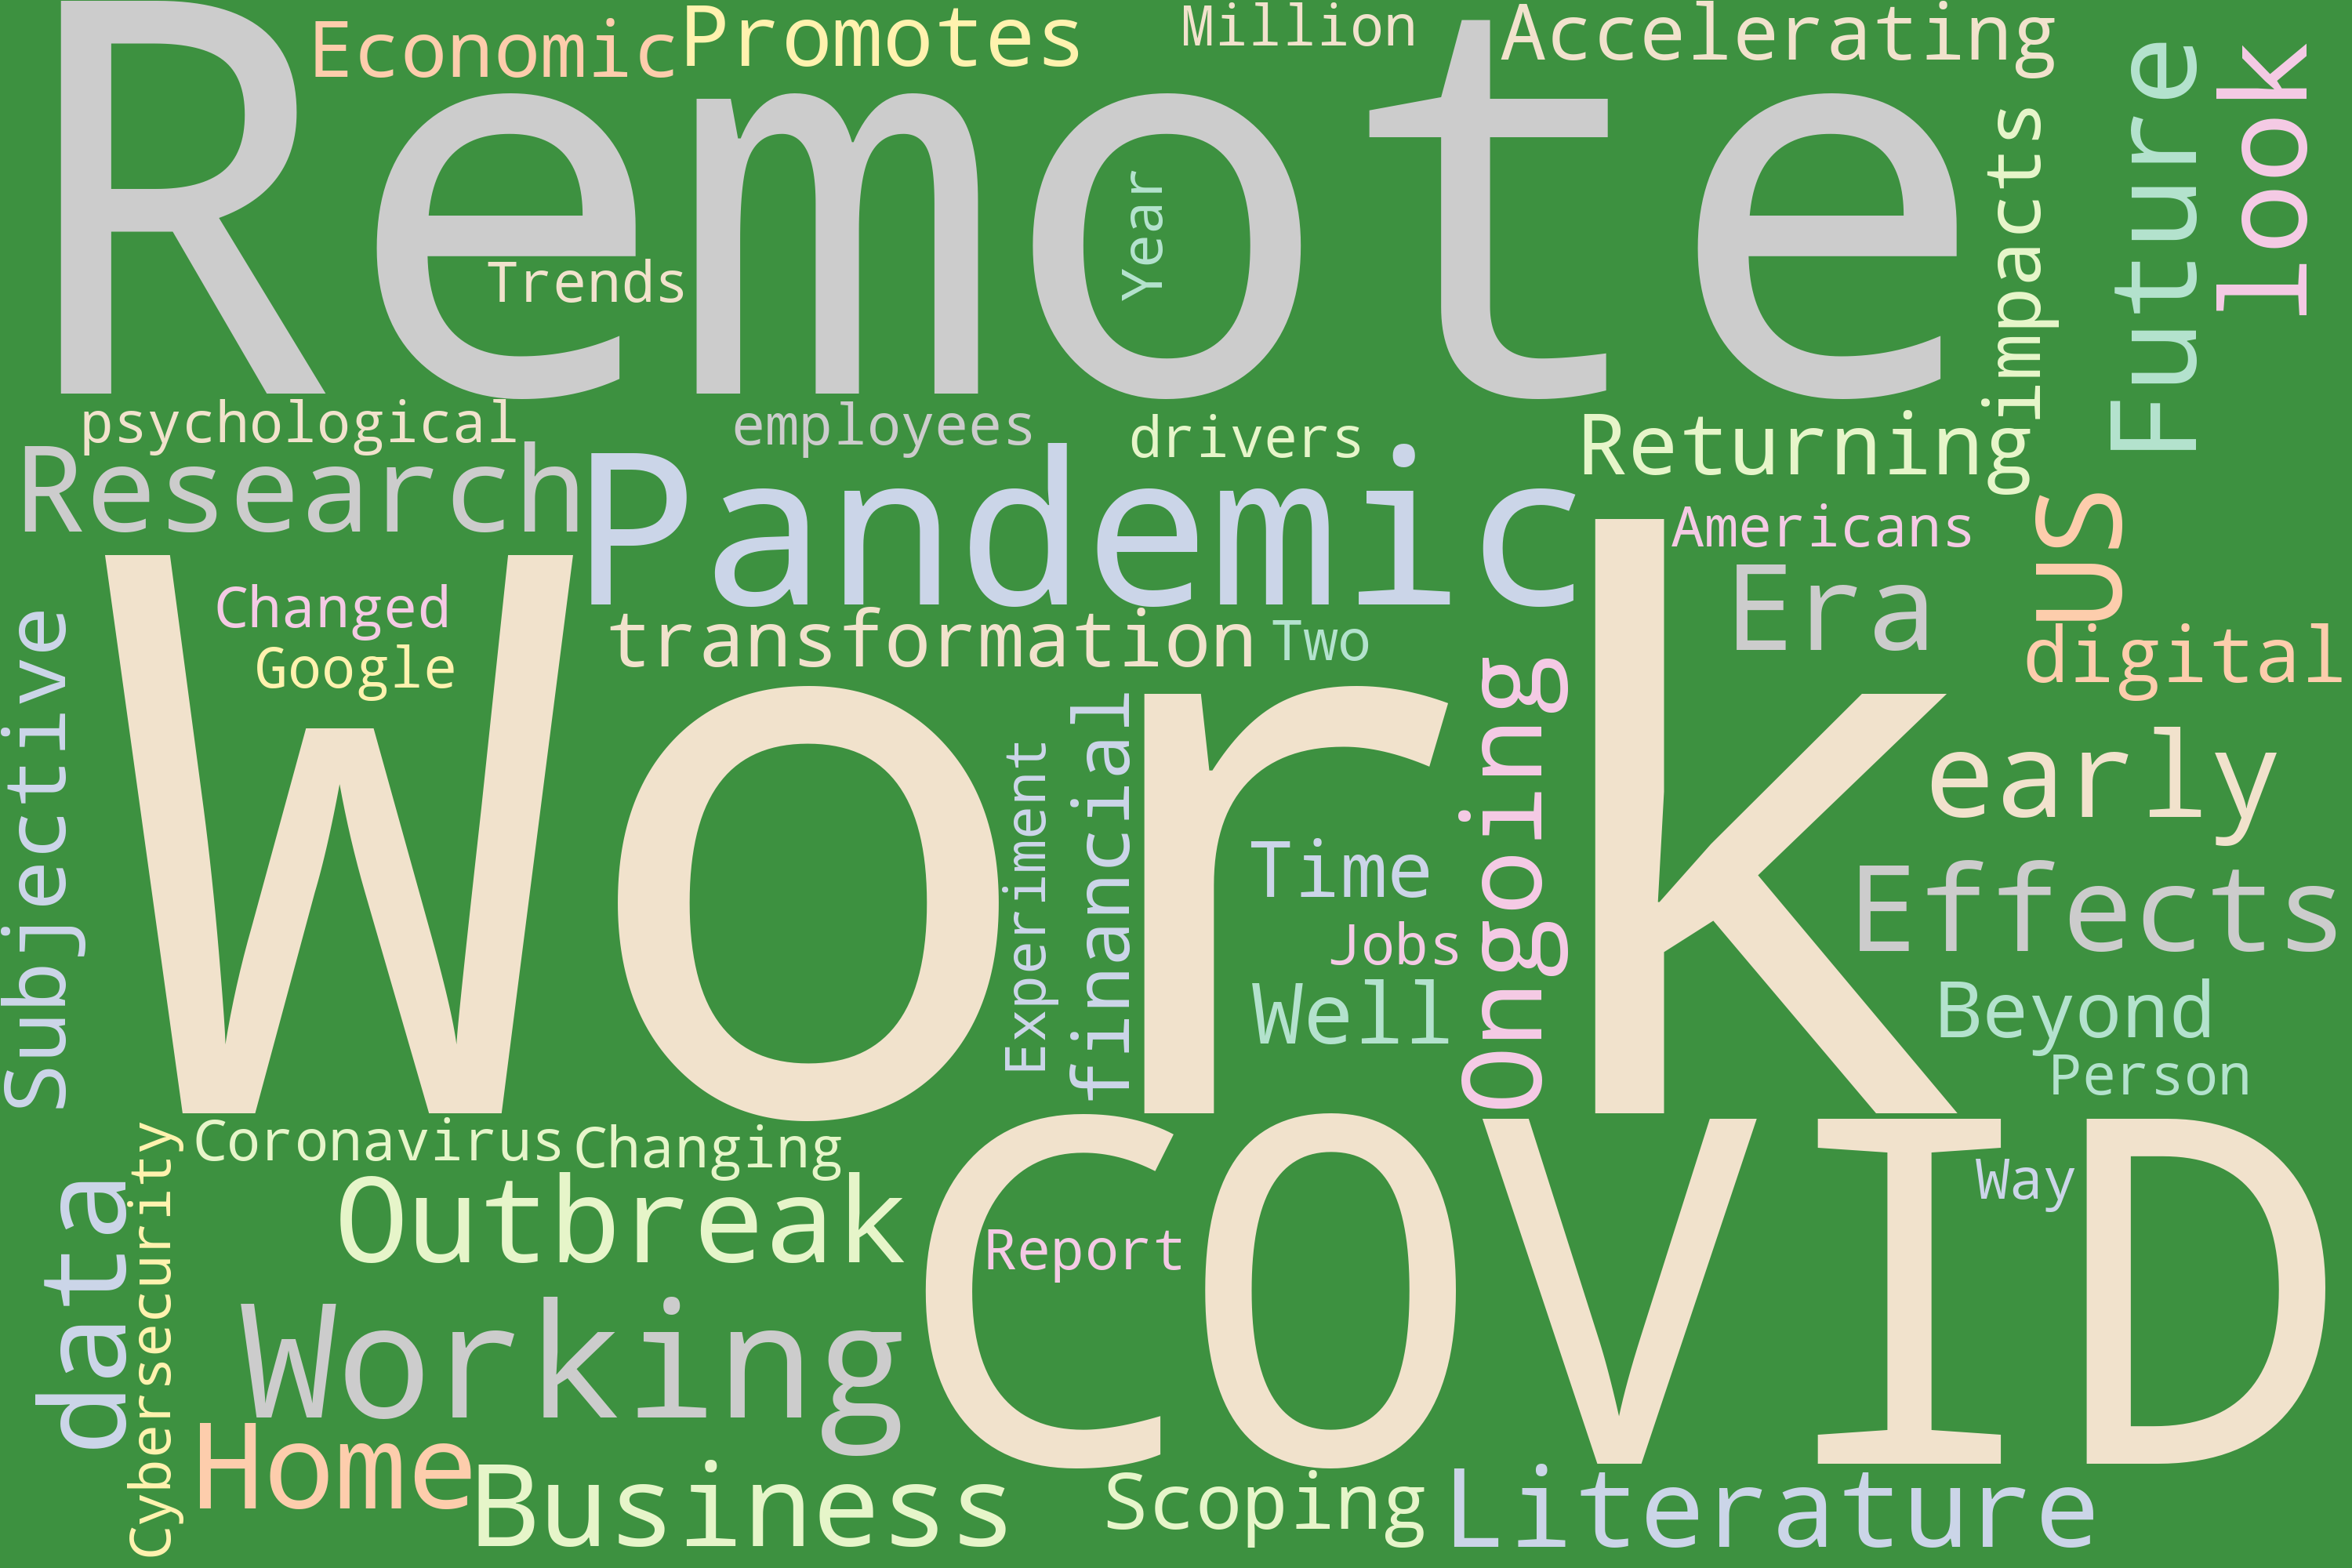

In [9]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

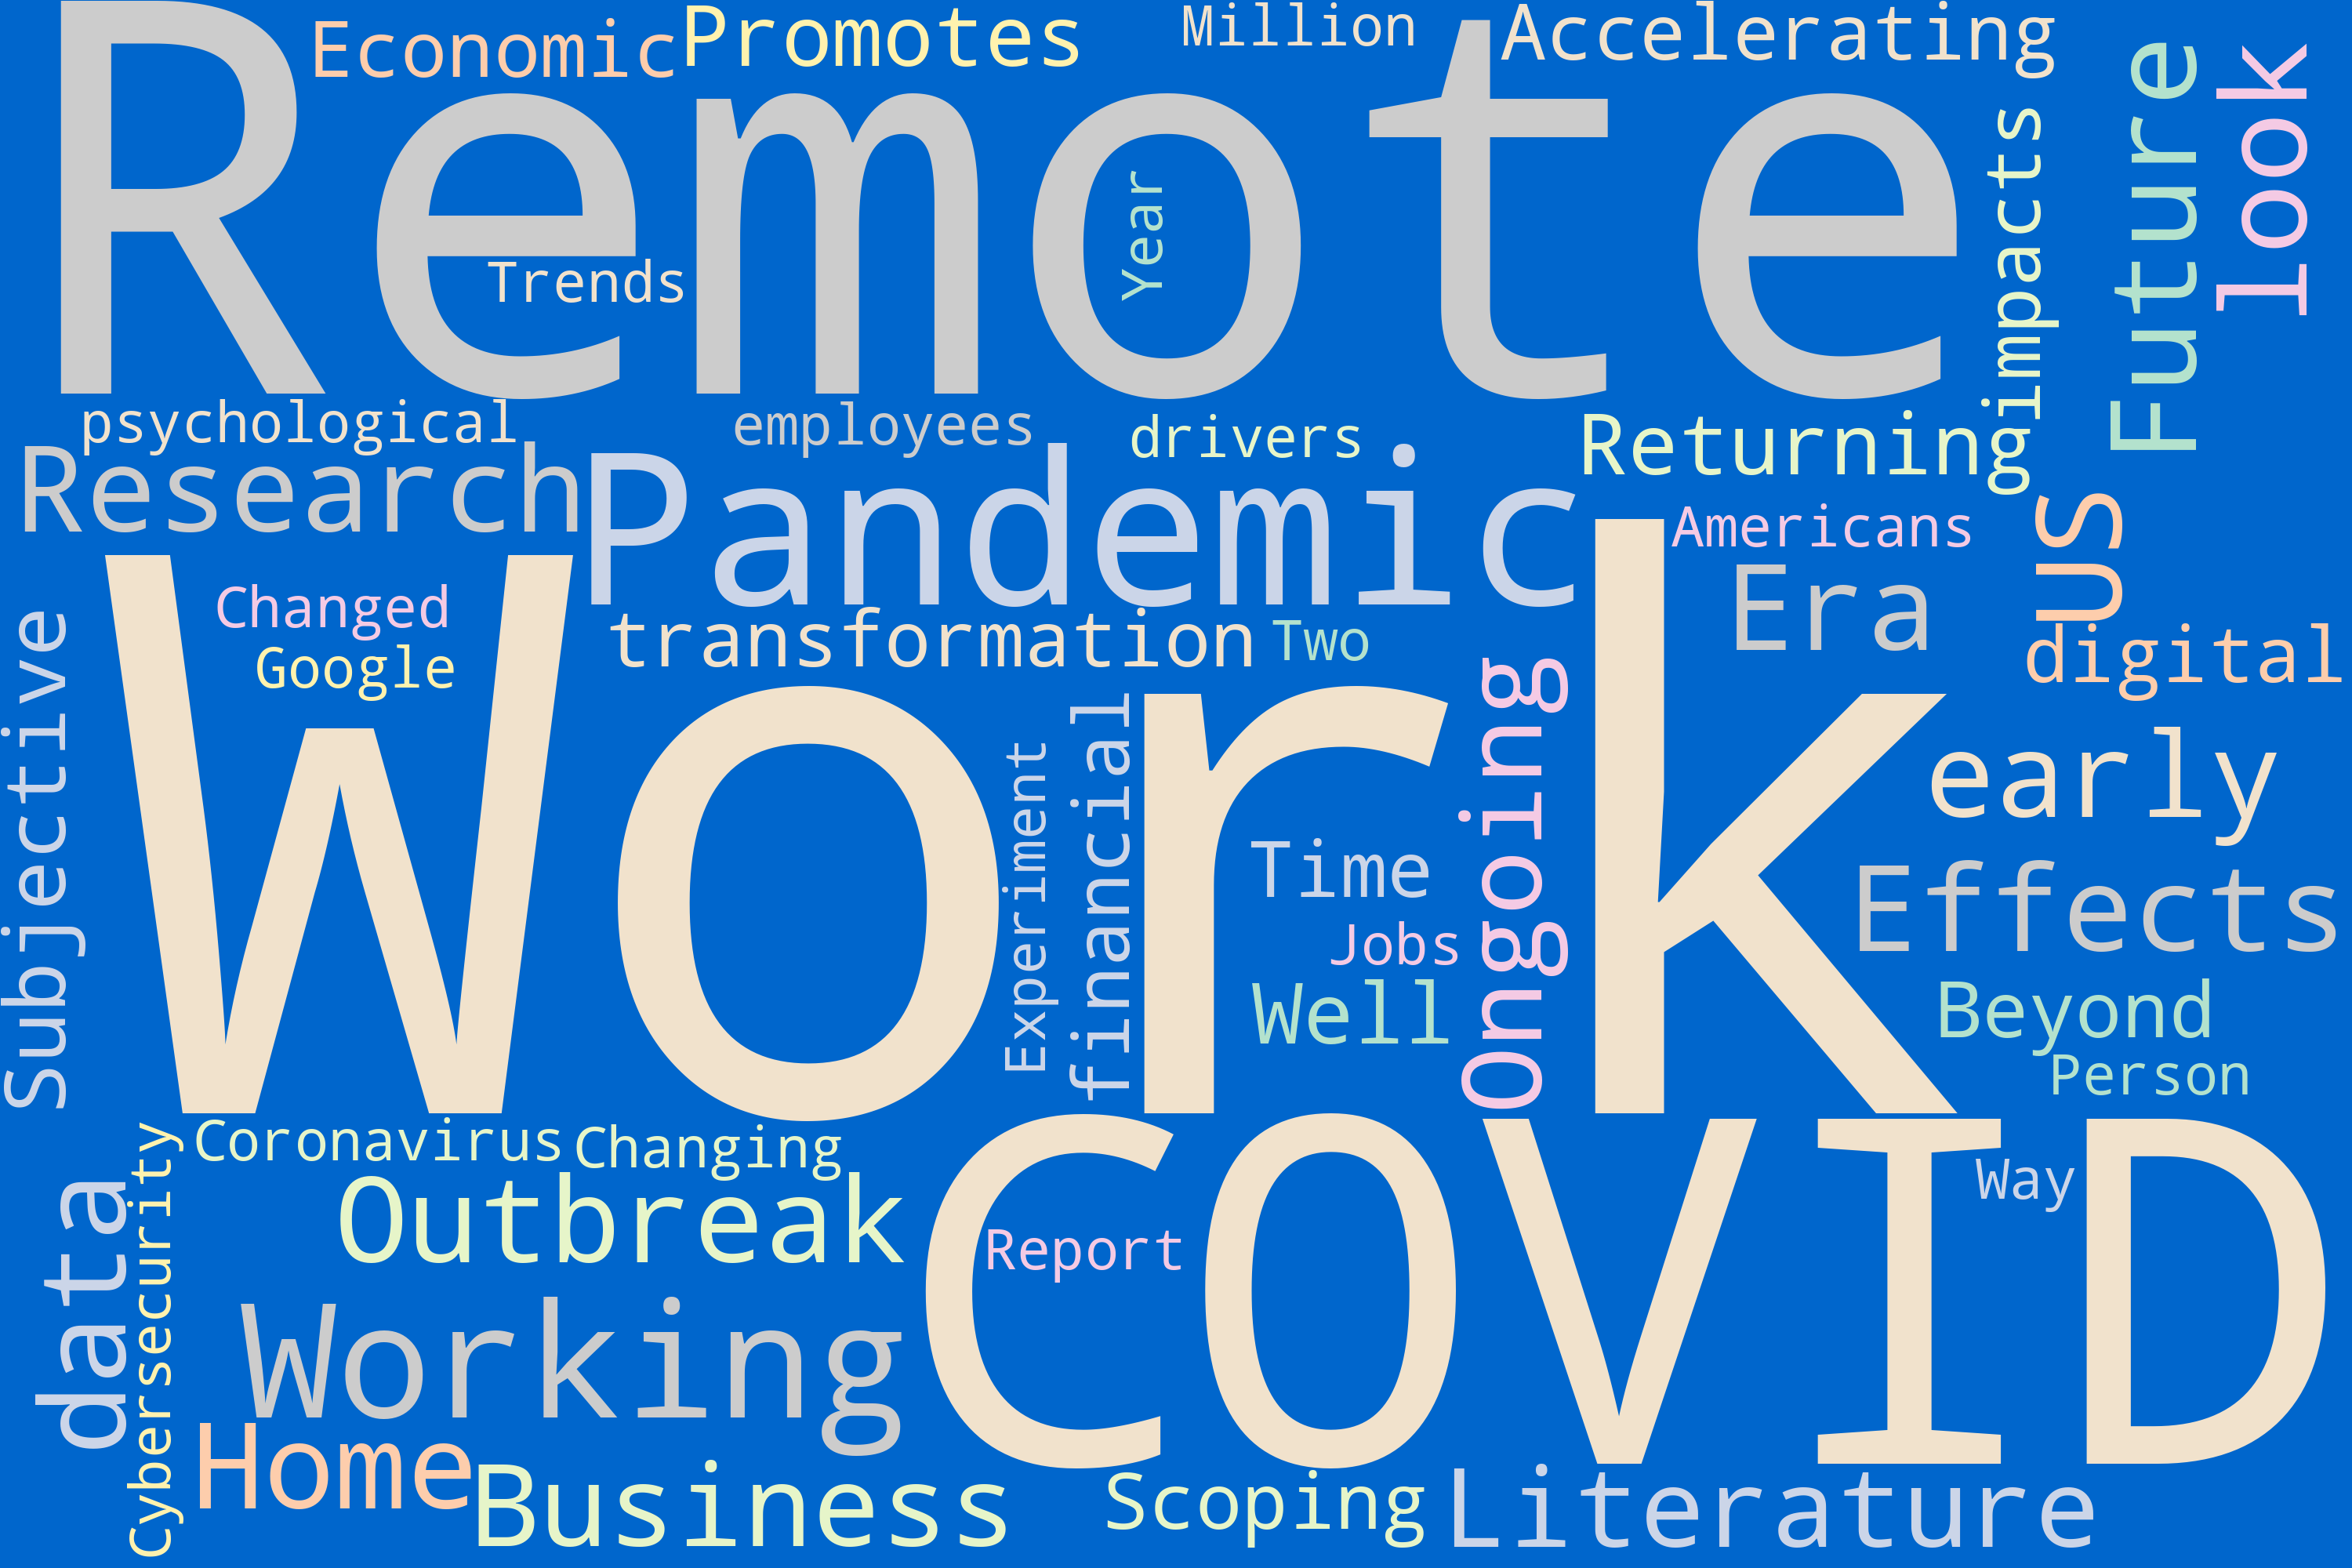

In [10]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [14]:
# Join the different processed titles together.
df["Abstract"]=df["Abstract"].fillna("NA")
Abstract = ''.join(list(df['Abstract']))
Abstract

"The impact of COVID-19 on the way that we work arguably represents the most drastic and rapid shift to the global workforce that we have seen since World War II. This paper investigates the long term impacts of this remote work experiment and what we can anticipate in the future, based on the direct impact that COVID has had on hiring, sentiments around remote work, and plans moving forward. The analysis uses two waves of survey data: one fielded prior to the pandemic in November 2019, and the other fielded during the pandemic in April 2020. The surveys polled a combined 1,500 hiring managers which includes executives, VPs, and managers- so the results reflect the views and plans of those with direct influence over businesses’ remote work decisions. In short, these results provide before and after snapshots of how relevant decision makers view the remote work experiment so far and how it has affected their plans. The results suggest that the remote work experiment has gone better than

In [15]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

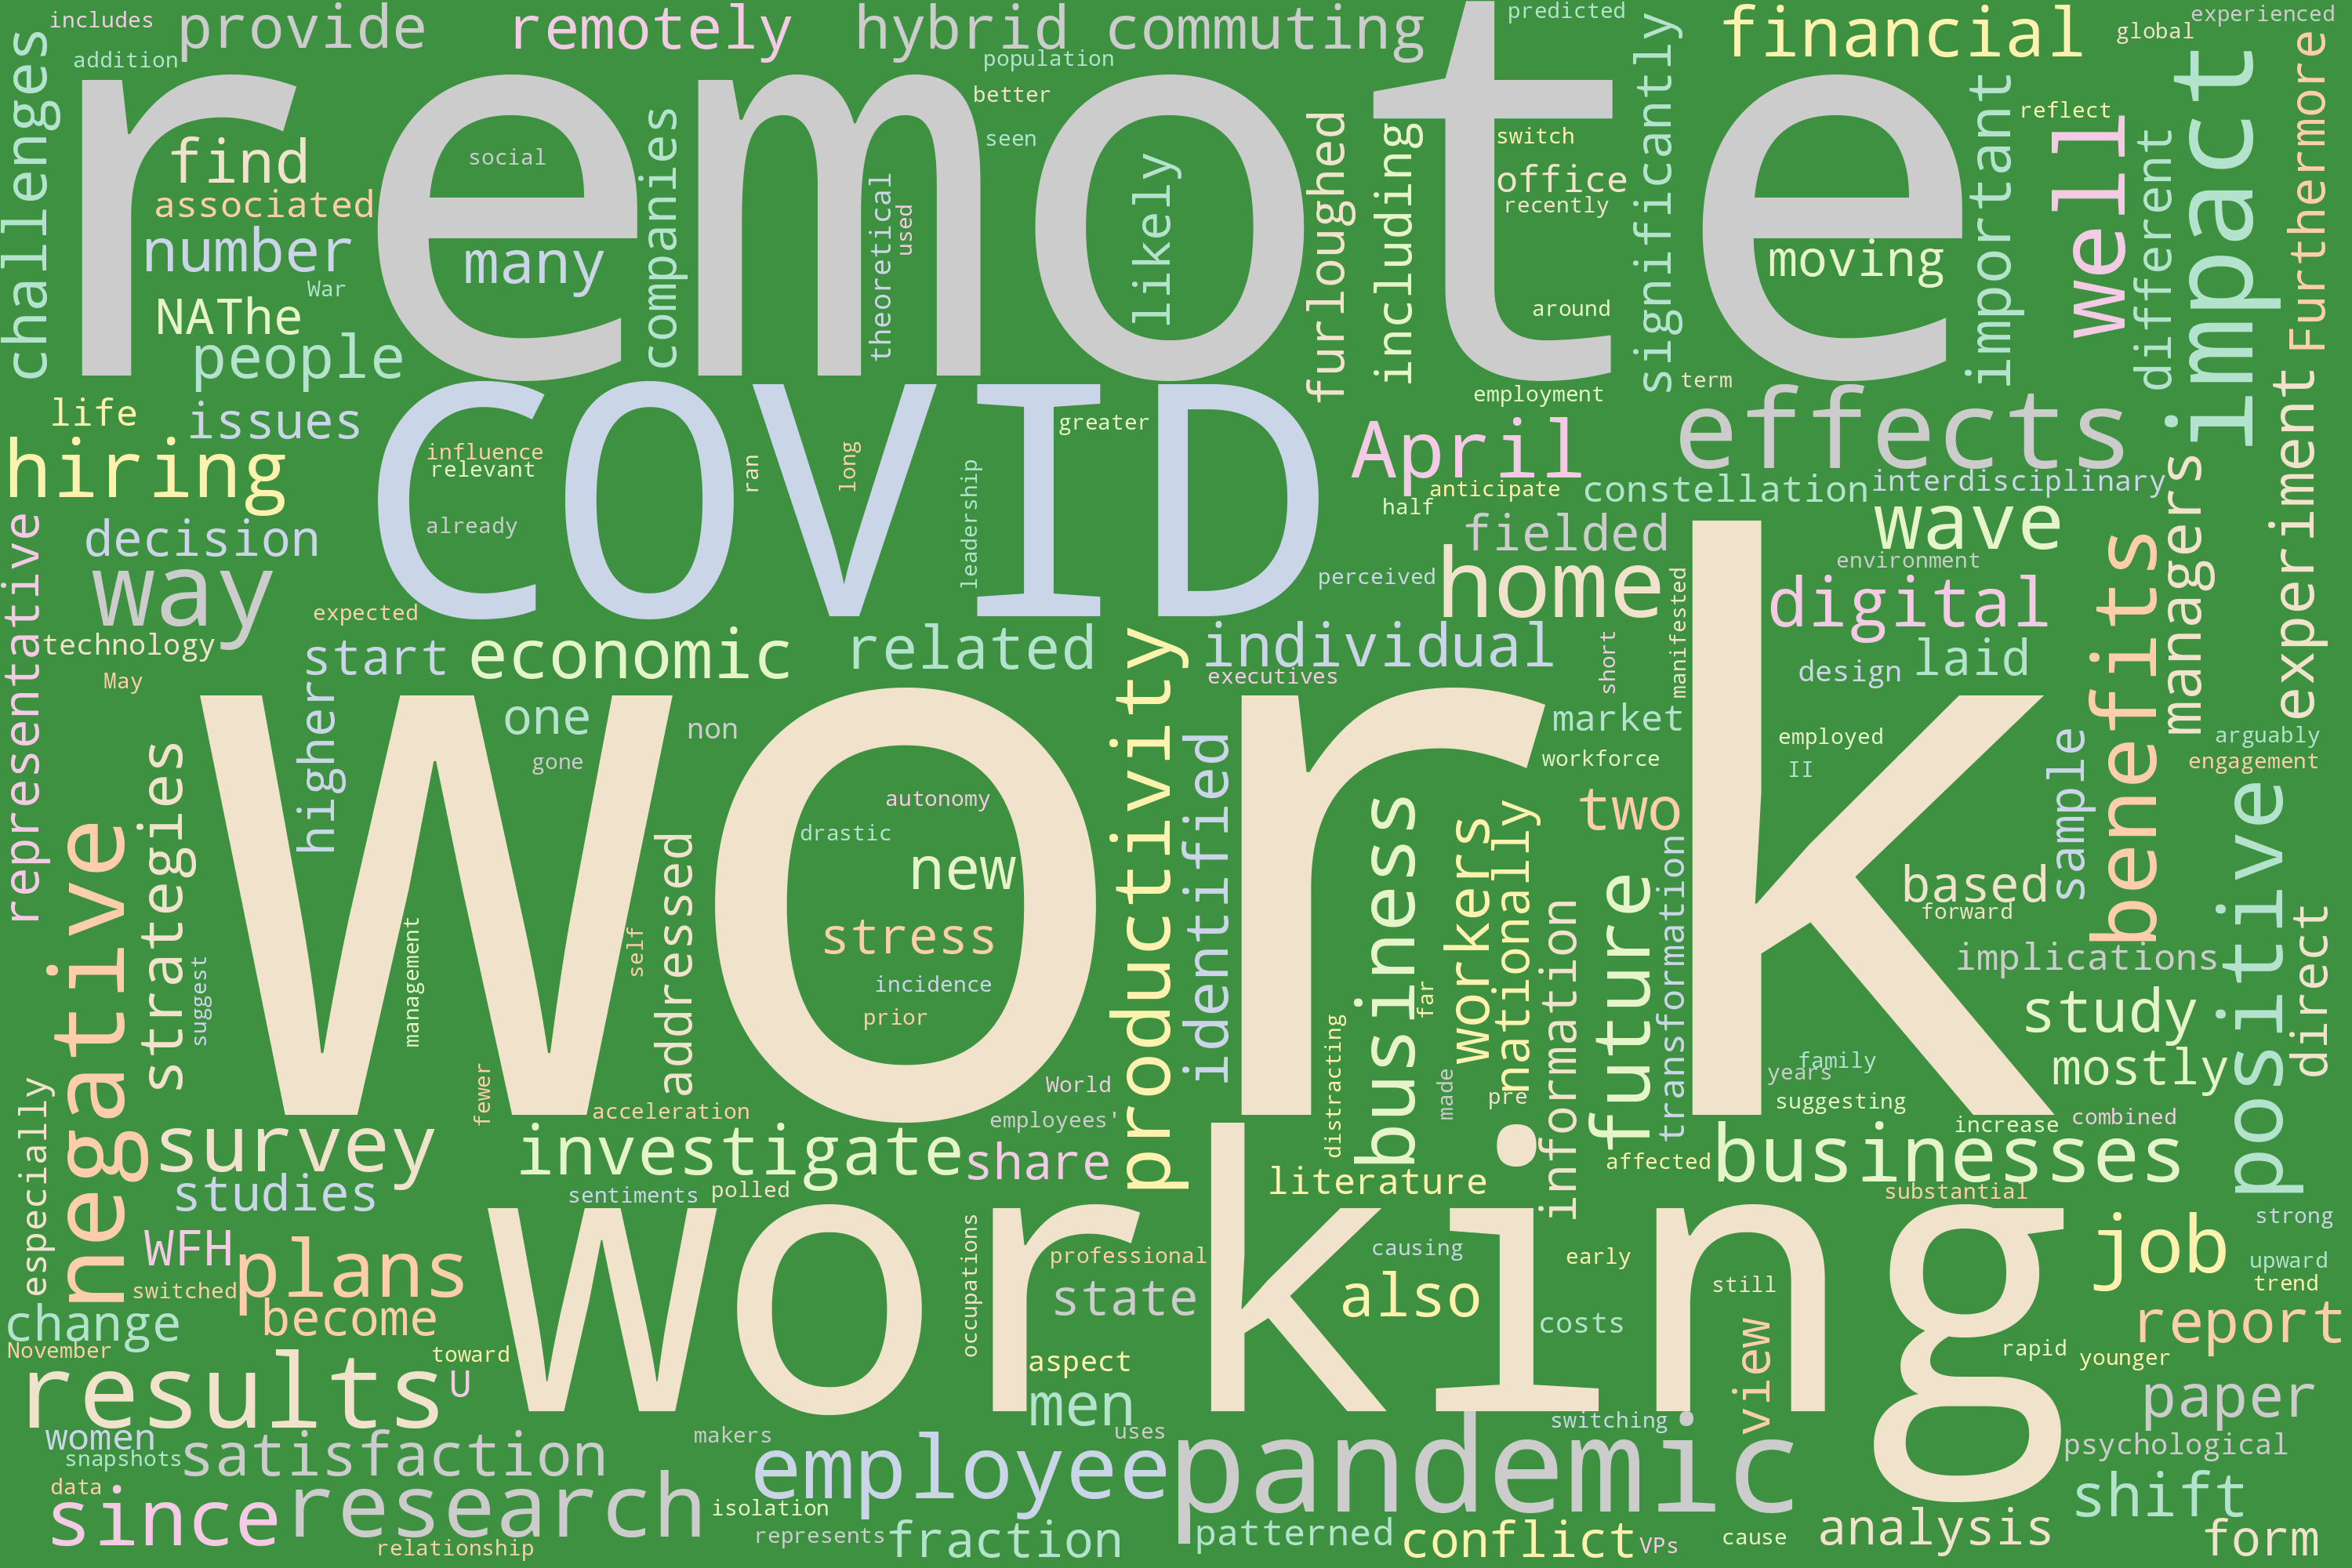

In [16]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

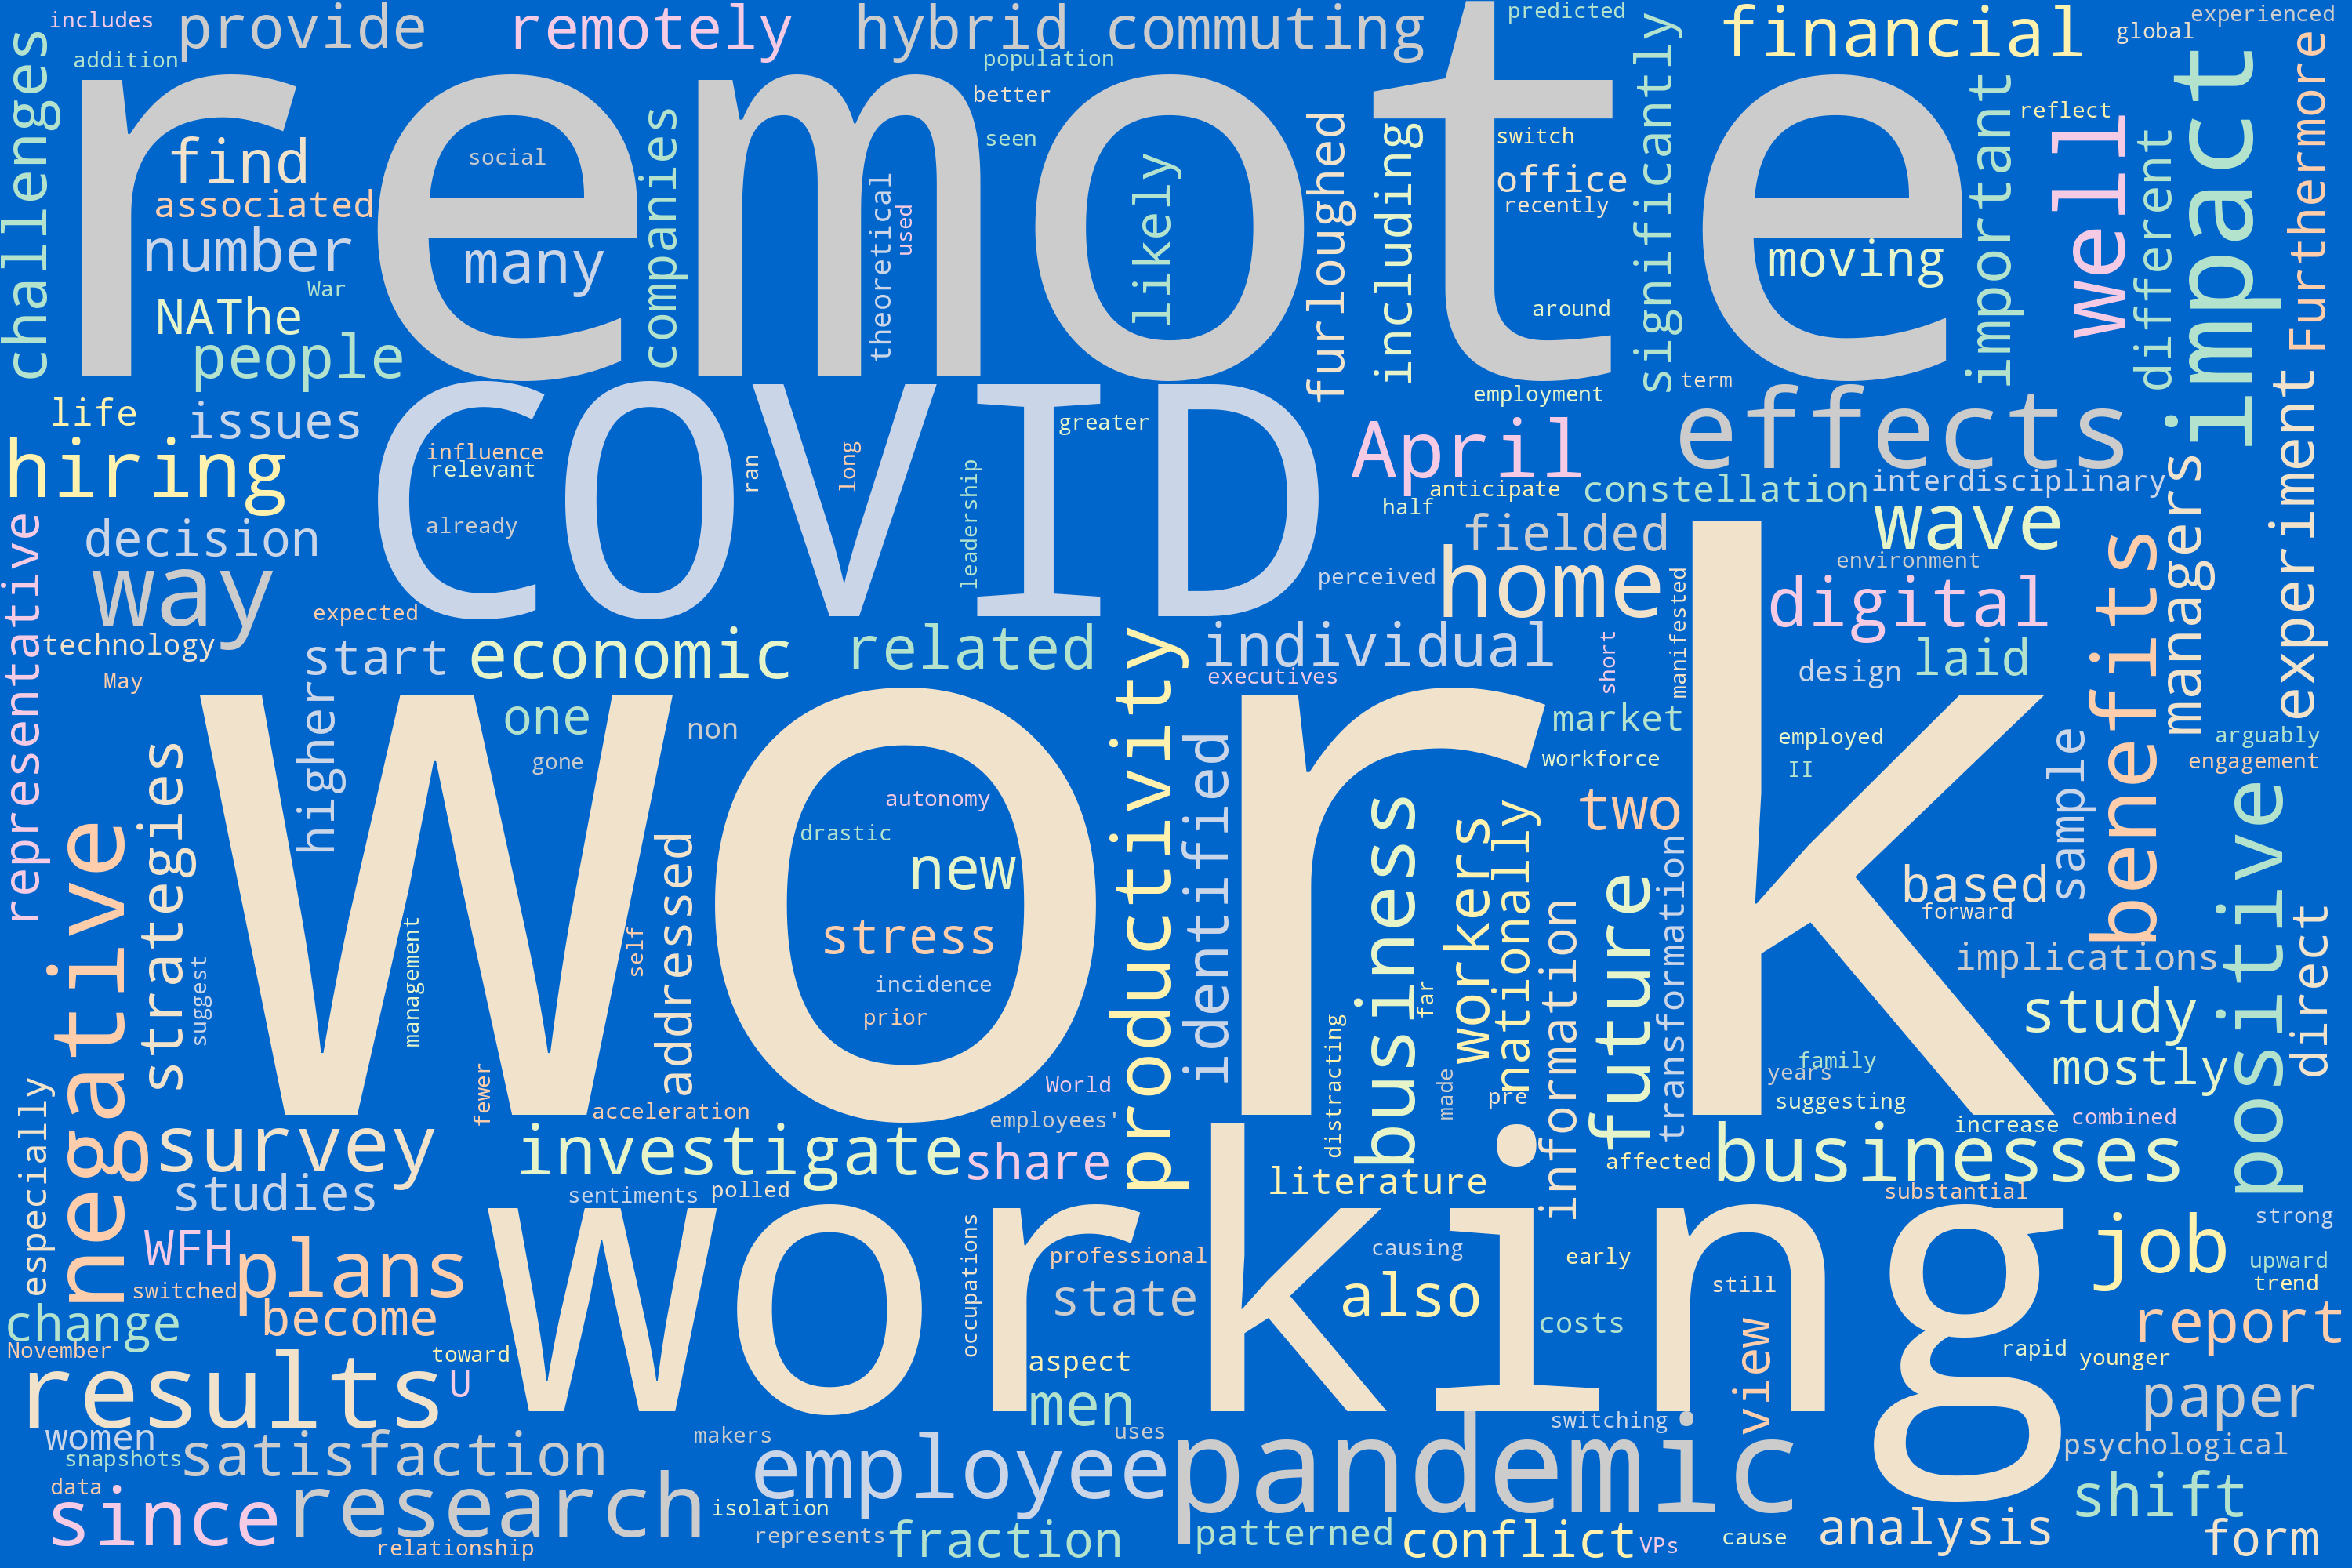

In [17]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [18]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Journal', 'Publication year',
       'Volume', 'Pages', 'Institution', 'Date published', 'Date accessed',
       'URLs', 'DOI', 'PMC ID', 'Abstract'],
      dtype='object')

In [19]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [20]:
df_Title  = df['Title'].str.lower()

In [21]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'the future of remote work  research on remote work in the era of covid-work from home during the covid-outbreak  covid-and remote work  an early look at us data  effects of remote business during the covid-pandemic - literature review  ongoing remote work, returning to working at work, or in between during covid-what promotes subjective well-being   accelerating remote work after covid-remote work at the time of covid-pandemic and beyond  scoping review  remote working and digital transformation during the covid-pandemic  economic–financial impacts and psychological drivers for employees  how coronavirus has changed the way americans work  google trends  remote work before, during, and after the pandemic  two-year, million-person experiment in changing how we work  cybersecurity jobs report '

In [22]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [23]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [24]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['the',
 'future',
 'of',
 'remote',
 'work',
 'research',
 'on',
 'remote',
 'work',
 'in',
 'the',
 'era',
 'of',
 'covid-work',
 'from',
 'home',
 'during',
 'the',
 'covid-outbreak',
 'covid-and',
 'remote',
 'work',
 'an',
 'early',
 'look',
 'at',
 'u',
 'data',
 'effect',
 'of',
 'remote',
 'business',
 'during',
 'the',
 'covid-pandemic',
 'literature',
 'review',
 'ongoing',
 'remote',
 'work,',
 'returning',
 'to',
 'working',
 'at',
 'work,',
 'or',
 'in',
 'between',
 'during',
 'covid-what',
 'promotes',
 'subjective',
 'well-being',
 'accelerating',
 'remote',
 'work',
 'after',
 'covid-remote',
 'work',
 'at',
 'the',
 'time',
 'of',
 'covid-pandemic',
 'and',
 'beyond',
 'scoping',
 'review',
 'remote',
 'working',
 'and',
 'digital',
 'transformation',
 'during',
 'the',
 'covid-pandemic',
 'economic–financial',
 'impact',
 'and',
 'psychological',
 'driver',
 'for',
 'employee',
 'how',
 'coronavirus',
 'ha',
 'changed',
 'the',
 'way',
 'american',
 'work',
 'google'

In [27]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['future',
 'remote',
 'work',
 'research',
 'remote',
 'work',
 'era',
 'covid-work',
 'home',
 'covid-outbreak',
 'covid-and',
 'remote',
 'work',
 'early',
 'look',
 'u',
 'data',
 'effect',
 'remote',
 'business',
 'covid-pandemic',
 'literature',
 'ongoing',
 'remote',
 'work,',
 'returning',
 'working',
 'work,',
 'covid-what',
 'promotes',
 'subjective',
 'well-being',
 'accelerating',
 'remote',
 'work',
 'covid-remote',
 'work',
 'time',
 'covid-pandemic',
 'beyond',
 'scoping',
 'remote',
 'working',
 'digital',
 'transformation',
 'covid-pandemic',
 'economic–financial',
 'impact',
 'psychological',
 'driver',
 'employee',
 'coronavirus',
 'ha',
 'changed',
 'way',
 'american',
 'work',
 'google',
 'trend',
 'remote',
 'work',
 'before,',
 'during,',
 'pandemic',
 'two-year,',
 'million-person',
 'experiment',
 'changing',
 'work',
 'cybersecurity',
 'job',
 'report']

In [28]:
import collections

In [29]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [30]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0                         (remote, work)       5
50                        (changed, way)       1
36                     (beyond, scoping)       1
37                     (scoping, remote)       1
38                     (remote, working)       1
39                    (working, digital)       1
40             (digital, transformation)       1
41      (transformation, covid-pandemic)       1
42  (covid-pandemic, economic–financial)       1
43          (economic–financial, impact)       1
44               (impact, psychological)       1
45               (psychological, driver)       1
46                    (driver, employee)       1
47               (employee, coronavirus)       1
48                     (coronavirus, ha)       1
49                         (ha, changed)       1
51                       (way, american)       1
34                (time, covid-pandemic)       1
52                      (american, work)       1
53                        (work, google)       1

In [31]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                              bigram &  counts \\
\midrule
                      (remote, work) &       5 \\
                      (changed, way) &       1 \\
                   (beyond, scoping) &       1 \\
                   (scoping, remote) &       1 \\
                   (remote, working) &       1 \\
                  (working, digital) &       1 \\
           (digital, transformation) &       1 \\
    (transformation, covid-pandemic) &       1 \\
(covid-pandemic, economic–financial) &       1 \\
        (economic–financial, impact) &       1 \\
             (impact, psychological) &       1 \\
             (psychological, driver) &       1 \\
                  (driver, employee) &       1 \\
             (employee, coronavirus) &       1 \\
                   (coronavirus, ha) &       1 \\
                       (ha, changed) &       1 \\
                     (way, american) &       1 \\
              (time, covid-pandemic) &       1 \\
            

<ipython-input-31-d48c86c5ce71>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(title_bigram.head(25).to_latex(index=False))


In [32]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                                   |   counts |
|:-----------------------------------------|---------:|
| ('remote', 'work')                       |        5 |
| ('changed', 'way')                       |        1 |
| ('beyond', 'scoping')                    |        1 |
| ('scoping', 'remote')                    |        1 |
| ('remote', 'working')                    |        1 |
| ('working', 'digital')                   |        1 |
| ('digital', 'transformation')            |        1 |
| ('transformation', 'covid-pandemic')     |        1 |
| ('covid-pandemic', 'economic–financial') |        1 |
| ('economic–financial', 'impact')         |        1 |
| ('impact', 'psychological')              |        1 |
| ('psychological', 'driver')              |        1 |
| ('driver', 'employee')                   |        1 |
| ('employee', 'coronavirus')              |        1 |
| ('coronavirus', 'ha')                    |        1 |
| ('ha', 'changed')                        |    

In [33]:
title_bigram.to_csv("title_bigram.csv")

In [34]:
import networkx as nx

In [35]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [36]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [37]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [39]:
import igviz as ig

In [40]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [41]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-41-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [42]:
df_Abstract = df['Abstract'].str.lower()

In [43]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"the impact of covid-on the way that we work arguably represents the most drastic and rapid shift to the global workforce that we have seen since world war ii  this paper investigates the long term impacts of this remote work experiment and what we can anticipate in the future  based on the direct impact that covid has had on hiring  sentiments around remote work  and plans moving forward  the analysis uses two waves of survey data  one fielded prior to the pandemic in november and the other fielded during the pandemic in april the surveys polled combined hiring managers which includes executives  vps  and managers- so the results reflect the views and plans of those with direct influence over businesses’ remote work decisions  in short  these results provide before and after snapshots of how relevant decision makers view the remote work experiment so far and how it has affected their plans  the results suggest that the remote work experiment has gone better than expected for hiring ma

In [44]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [45]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [46]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['the',
 'impact',
 'of',
 'covid-on',
 'the',
 'way',
 'that',
 'we',
 'work',
 'arguably',
 'represents',
 'the',
 'most',
 'drastic',
 'and',
 'rapid',
 'shift',
 'to',
 'the',
 'global',
 'workforce',
 'that',
 'we',
 'have',
 'seen',
 'since',
 'world',
 'war',
 'ii',
 'this',
 'paper',
 'investigates',
 'the',
 'long',
 'term',
 'impact',
 'of',
 'this',
 'remote',
 'work',
 'experiment',
 'and',
 'what',
 'we',
 'can',
 'anticipate',
 'in',
 'the',
 'future',
 'based',
 'on',
 'the',
 'direct',
 'impact',
 'that',
 'covid',
 'ha',
 'had',
 'on',
 'hiring',
 'sentiment',
 'around',
 'remote',
 'work',
 'and',
 'plan',
 'moving',
 'forward',
 'the',
 'analysis',
 'us',
 'two',
 'wave',
 'of',
 'survey',
 'data',
 'one',
 'fielded',
 'prior',
 'to',
 'the',
 'pandemic',
 'in',
 'november',
 'and',
 'the',
 'other',
 'fielded',
 'during',
 'the',
 'pandemic',
 'in',
 'april',
 'the',
 'survey',
 'polled',
 'combined',
 'hiring',
 'manager',
 'which',
 'includes',
 'executive',
 'vps

In [48]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['impact',
 'covid-on',
 'way',
 'work',
 'arguably',
 'represents',
 'drastic',
 'rapid',
 'shift',
 'global',
 'workforce',
 'seen',
 'since',
 'world',
 'war',
 'ii',
 'paper',
 'investigates',
 'long',
 'term',
 'impact',
 'remote',
 'work',
 'experiment',
 'anticipate',
 'future',
 'based',
 'direct',
 'impact',
 'covid',
 'hiring',
 'sentiment',
 'around',
 'remote',
 'work',
 'plan',
 'moving',
 'forward',
 'analysis',
 'us',
 'two',
 'wave',
 'data',
 'one',
 'fielded',
 'prior',
 'pandemic',
 'november',
 'fielded',
 'pandemic',
 'april',
 'polled',
 'combined',
 'hiring',
 'manager',
 'includes',
 'executive',
 'vps',
 'managers-',
 'result',
 'reflect',
 'view',
 'plan',
 'direct',
 'influence',
 'businesses’',
 'remote',
 'work',
 'decision',
 'short',
 'result',
 'provide',
 'snapshot',
 'relevant',
 'decision',
 'maker',
 'view',
 'remote',
 'work',
 'experiment',
 'far',
 'affected',
 'plan',
 'result',
 'suggest',
 'remote',
 'work',
 'experiment',
 'gone',
 'better',
 

In [49]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [50]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0                 (remote, work)      18
1                (working, home)       6
2                 (way, working)       5
3             (negative, effect)       4
4              (remote, working)       4
5                       (na, na)       4
6               (impact, remote)       3
7             (work, experiment)       3
8                    (two, wave)       3
9   (economic–financial, impact)       3
16            (positive, effect)       2
22         (digital, technology)       2
21          (benefit, challenge)       2
19            (mostly, positive)       2
18        (effect, productivity)       2
17              (also, negative)       2
20        (business, individual)       2
15              (form, business)       2
13                    (new, way)       2
12           (working, remotely)       2
11             (result, provide)       2
14                (since, start)       2
10             (hiring, manager)       2
71           (manager, includes)       1
78                  (view, plan)       1

In [51]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                      bigram &  counts \\
\midrule
              (remote, work) &      18 \\
             (working, home) &       6 \\
              (way, working) &       5 \\
          (negative, effect) &       4 \\
           (remote, working) &       4 \\
                    (na, na) &       4 \\
            (impact, remote) &       3 \\
          (work, experiment) &       3 \\
                 (two, wave) &       3 \\
(economic–financial, impact) &       3 \\
          (positive, effect) &       2 \\
       (digital, technology) &       2 \\
        (benefit, challenge) &       2 \\
          (mostly, positive) &       2 \\
      (effect, productivity) &       2 \\
            (also, negative) &       2 \\
      (business, individual) &       2 \\
            (form, business) &       2 \\
                  (new, way) &       2 \\
         (working, remotely) &       2 \\
           (result, provide) &       2 \\
              (since, start) &       2

<ipython-input-51-84cfb0cbda73>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [52]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                           |   counts |
|:---------------------------------|---------:|
| ('remote', 'work')               |       18 |
| ('working', 'home')              |        6 |
| ('way', 'working')               |        5 |
| ('negative', 'effect')           |        4 |
| ('remote', 'working')            |        4 |
| ('na', 'na')                     |        4 |
| ('impact', 'remote')             |        3 |
| ('work', 'experiment')           |        3 |
| ('two', 'wave')                  |        3 |
| ('economic–financial', 'impact') |        3 |
| ('positive', 'effect')           |        2 |
| ('digital', 'technology')        |        2 |
| ('benefit', 'challenge')         |        2 |
| ('mostly', 'positive')           |        2 |
| ('effect', 'productivity')       |        2 |
| ('also', 'negative')             |        2 |
| ('business', 'individual')       |        2 |
| ('form', 'business')             |        2 |
| ('new', 'way')                   |    

In [53]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [54]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [55]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [57]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [58]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-58-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

